## Otros modelos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos datos

In [2]:
df = pd.read_csv('data/jj.csv', index_col=0)
print(len(df))
df.head()

84


,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


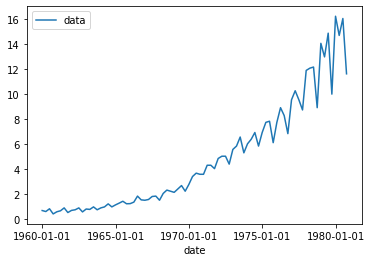

In [3]:
df.plot();

### Preparamos las features del dataset

In [4]:
for i in range(12, 0, -1):
    df['t-' + str(i)] = df['data'].shift(i)

In [5]:
df.dropna(inplace=True)
df

,data,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1963-01-01,0.83,0.710000,0.630000,0.850000,0.440000,0.610000,0.69,0.92,0.55,0.72,0.77,0.92,0.60
1963-04-02,0.80,0.630000,0.850000,0.440000,0.610000,0.690000,0.92,0.55,0.72,0.77,0.92,0.60,0.83
1963-07-02,1.00,0.850000,0.440000,0.610000,0.690000,0.920000,0.55,0.72,0.77,0.92,0.60,0.83,0.80
1963-10-01,0.77,0.440000,0.610000,0.690000,0.920000,0.550000,0.72,0.77,0.92,0.60,0.83,0.80,1.00
1964-01-01,0.92,0.610000,0.690000,0.920000,0.550000,0.720000,0.77,0.92,0.60,0.83,0.80,1.00,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979-10-01,9.99,6.840000,9.540000,10.260000,9.540000,8.729999,11.88,12.06,12.15,8.91,14.04,12.96,14.85
1980-01-01,16.20,9.540000,10.260000,9.540000,8.729999,11.880000,12.06,12.15,8.91,14.04,12.96,14.85,9.99
1980-04-01,14.67,10.260000,9.540000,8.729999,11.880000,12.060000,12.15,8.91,14.04,12.96,14.85,9.99,16.20


### Dividimos en train test

In [6]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

X_train = X[:60]
X_test = X[60:]
y_train = Y[:60]
y_test = Y[60:]

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (60, 12)
Shape X_test: (12, 12)
Shape y_train: (60,)
Shape y_test: (12,)


### Creamos el árbol de decisión

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
from sklearn.metrics import mean_squared_error

print("MSE:", mean_squared_error(tree.predict(X_test), y_test))
print("RMSE:", np.sqrt(mean_squared_error(tree.predict(X_test), y_test)))

MSE: 12.096675030000084
RMSE: 3.478027462513786


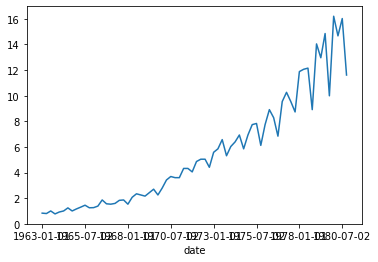

In [9]:
df['data'].plot();

### Representamos las predicciones

In [10]:
def prediction(model, x_test):
    preds = x_test[0]
    preds_out = []
    for i in range(len(X_test)):
        pred = model.predict([preds])[0]
        preds_out.append(pred)

        preds2 = np.array([preds[1:]]) # Quitamos t-12, ya no se usa
        
        '''
        Concatenamos la nueva, es decir, el nuevo t-1
        '''
        preds = np.c_[preds2, np.array([pred])][0]
    return preds_out


In [11]:
preds = prediction(tree, X_test)
preds

[10.26,
 10.26,
 9.54,
 8.729999000000001,
 10.26,
 10.26,
 10.26,
 10.26,
 10.26,
 10.26,
 10.26,
 10.26]

In [12]:
print("MSE:", mean_squared_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))

MSE: 12.096675030000084
RMSE: 3.478027462513786


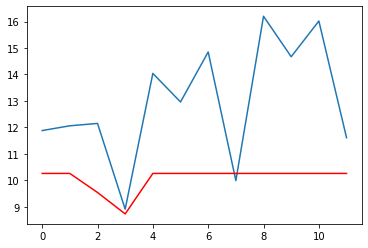

In [13]:
plt.plot(y_test);
plt.plot(prediction(tree, X_test), color='red');

### Probamos con un RandomForest

In [16]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, max_depth=5)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=200)

In [17]:
preds = prediction(rfr, X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))

MSE: 15.55577822828983
RMSE: 3.944081417553374


## Probamos también una regresión lineal

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()  # n_estimators is the number of trees in forest
lin_reg.fit(X_train, y_train)

print("MSE:", mean_squared_error(lin_reg.predict(X_test), y_test))
print("RMSE:", np.sqrt(mean_squared_error(lin_reg.predict(X_test), y_test)))

MSE: 1.3371420639448248
RMSE: 1.156348591016059


In [19]:
preds = prediction(lin_reg, X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))

MSE: 2.21791665161966
RMSE: 1.489267152534984


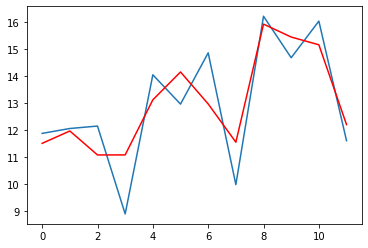

In [20]:
plt.plot(y_test);
plt.plot(lin_reg.predict(X_test), color='red');

In [21]:
y_test

array([11.88, 12.06, 12.15,  8.91, 14.04, 12.96, 14.85,  9.99, 16.2 ,
       14.67, 16.02, 11.61])

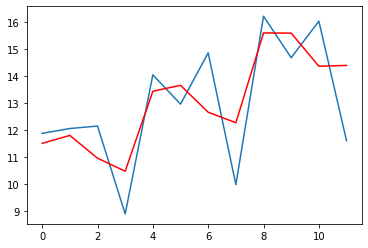

In [22]:
plt.plot(y_test);
plt.plot(prediction(lin_reg, X_test), color='red');